In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
from tensorflow import keras
import numpy as np
# from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
# from tensorflow.keras.models import Sequential, Model


from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from numpy import *
from PIL import Image
import theano
import seaborn as sns

Using TensorFlow backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_test = "./Datasets/training-data/"

In [3]:
CATEGORIES = ['bright_dune','crater','dark_dune','impact_ejecta','slope_streak']

In [4]:
training = []

def createTrainingData():
  for category in CATEGORIES:
    path = os.path.join(path_test, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (227, 227))
      training.append([new_array, class_num])
      
createTrainingData()

In [5]:
random.shuffle(training)
X = []
y = []

for features, label in training:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1, 227, 227, 3)
y = np.array(y)

In [6]:
X = X.astype('float32')
X /= 255

In [7]:
model = keras.models.load_model(r'./models/cnn.h5')

In [8]:
Y_pred = model.predict(X)

y_pred = []
for i in range(len(Y_pred)):
    y_pred.append(np.argmax(Y_pred[i]))

In [9]:
from sklearn.metrics import classification_report

sk_report = classification_report(
    digits=6, #floating point accuracy
    y_true=y, 
    y_pred=y_pred)
print(sk_report)

              precision    recall  f1-score   support

           0   0.829808  0.975692  0.896856      1769
           1   0.969728  0.955585  0.962604      6034
           2   0.936153  0.952110  0.944064      1232
           3   0.972163  0.876448  0.921827       518
           4   0.950299  0.872781  0.909892      2366

    accuracy                       0.938334     11919
   macro avg   0.931630  0.926523  0.927049     11919
weighted avg   0.941740  0.938334  0.938694     11919



In [10]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

In [11]:
roc_auc_dict = roc_auc_score_multiclass(y, y_pred)
roc_auc_dict

{0: 0.970407817168699,
 1: 0.9624993910181585,
 2: 0.9723123296419123,
 3: 0.9376538127963442,
 4: 0.930737857991882}

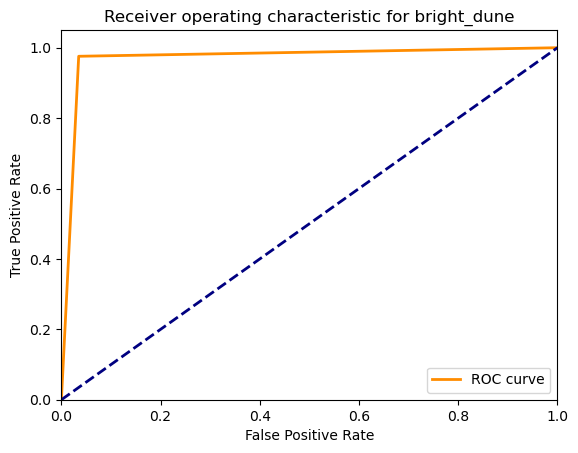

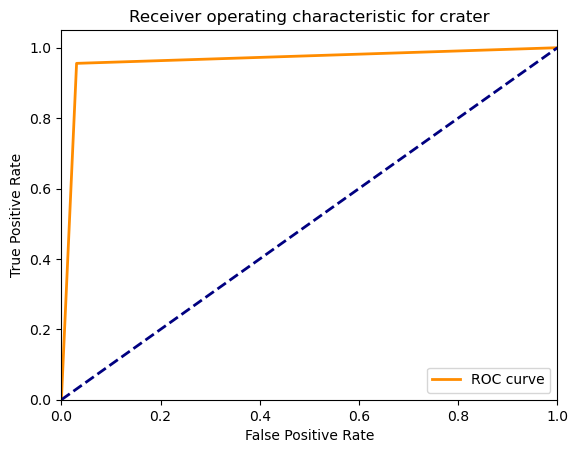

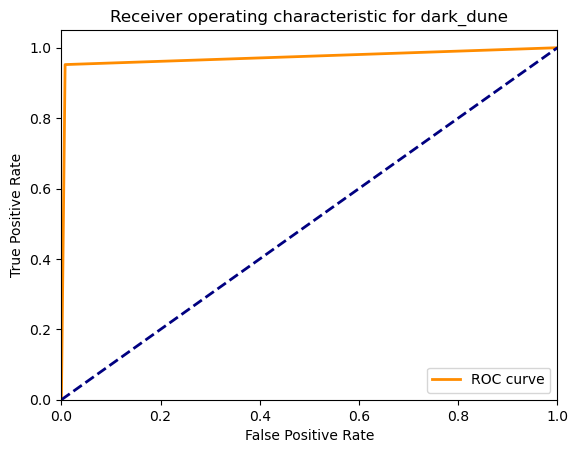

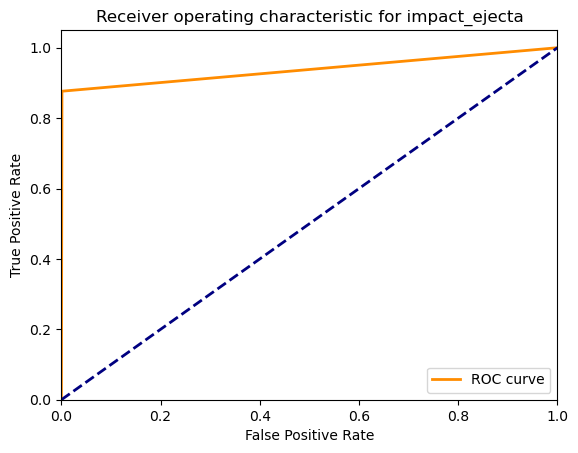

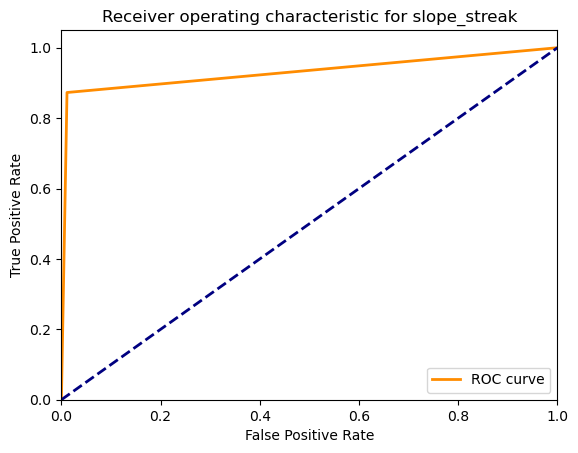

In [12]:
def getROC(cat, trueData, modelData):
    trail_test = []
    trail_pred = []

    for i in range(len(trueData)):
        if(trueData[i] == cat):
            trail_test.append(1)
        else:
            trail_test.append(0)

        if(modelData[i] == cat):
            trail_pred.append(1)
        else:
            trail_pred.append(0)

    fpr, tpr, thresholds = metrics.roc_curve(trail_test, trail_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for {CATEGORIES[cat]}')
    plt.legend(loc="lower right")
    plt.show()

for i in range(5):
    getROC(i, y, y_pred)

Confusion Matrix


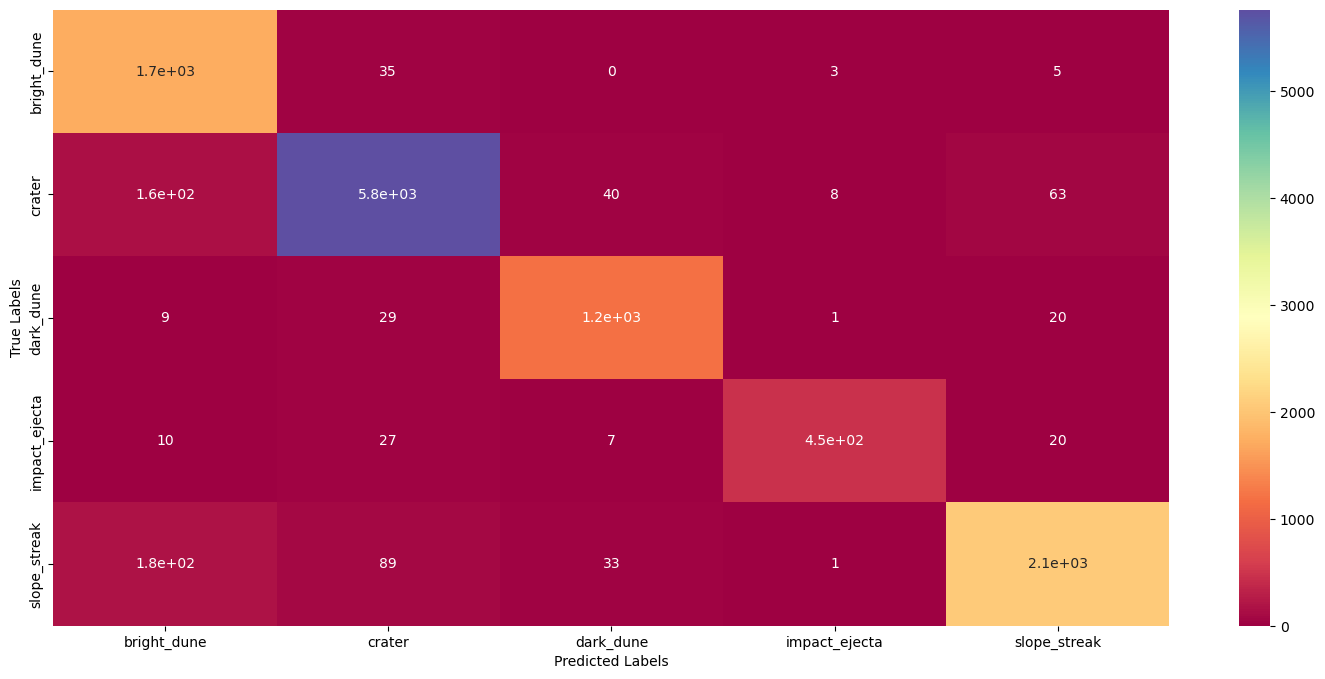

In [13]:
plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot = True, xticklabels = CATEGORIES, yticklabels = CATEGORIES, cmap = 'Spectral')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()